###### 2023-11-29 ITHS

```
===============================

Lektion 5: Robert Nyquist

===============================
```

- Data Engineering / Data Processing
    - Onehot encoding
    - Normalizaion + Standardization
    - Feature engineering
    - Augmentation

- Regularizations
    - Early stopping
    - L1/L2
    - Drop out

- Optimizing hyperparams

## Data & Feature Engineering

More training data = better results (IFF good/clean data), but there is a point where adding more data may not result in substantial improvements (Diminishing returns)

Use feature engineering to represent the data:

Simple example:

In [2]:
import pandas as pd

data = {'Attack': [2, 3, 1, 4],
        'Health': [1, 2, 4, 3],
        'Level': [1, 2, 2, 3]}
df = pd.DataFrame(data)

# Feature engineering (data aggregation)
df['Total Stats'] = df['Health'] + df['Attack']

df

,Attack,Health,Level,Total Stats
0,2,1,1,3
1,3,2,2,5
2,1,4,2,5
3,4,3,3,7


Now, we have a new feature, "Total Stats," which might provide additional information to the model about the data.

### Example 2: Date

Feature engineering involves creating or transforming features to provide the model with more relevant information, helping it make better predictions.  Instead of using the date directly, we extract additional features from it.

In [4]:
data = {'Date': ['2023-01-01', '2023-02-01', '2023-03-01'],
        'Sales': [100, 150, 200]}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df

,Date,Sales,Year,Month,Day
0,2023-01-01,100,2023,1,1
1,2023-02-01,150,2023,2,1
2,2023-03-01,200,2023,3,1


### Data cleaning
- Remove duplicates
- Handle missing data
- Filter outlier (be careful with this one)

**Validation**<br>
-> Get min, max, mean, std or other relevant metrics<br>
--> Are the values reasonable?<br>
---> Are the expected unique data atually unique?

## Encoding
Categorical data can be difficult to run through a model.<br>
Might want to represent numerically using:

- Ordinal encoding
- One-hot encoding
- Dummy encoding

### Ordinal encoding
Convert string values to ints.

"red", "green", "blue" = 0, 1, 2

Mostly practival for data with clear categorical rankings.

In [9]:
# Ordinal encoding example
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

colors = [['red'], ['green'], ['blue'], ['red'], ['green'], ['blue']]
df = pd.DataFrame(colors, columns=['Color'])

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()
df[['Color']] = encoder.fit_transform(df[['Color']])

df

,Color
0,2.0
1,1.0
2,0.0
3,2.0
4,1.0
5,0.0


### One-hot Encoding
Each category becomes a binary feature, and only one of these features is "hot" (set to 1) for a particular data point.

Each fruit is its own feature vector:

:apple: = [1, 0, 0, 0]<br>
:lemon: = [0, 1, 0, 0]<br>
:tomato: = [0, 0, 1, 0]<br>
:pineapple: = [0, 0, 0, 1]<br>

Many features / dimensions in the input data, no order = :thumbsup:

In [17]:
# One-hot encoding example
from sklearn.preprocessing import OneHotEncoder

data = {'Fruit': ['🍎', '🍋', '🍅', '🍍']}
df = pd.DataFrame(data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Fruit']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Fruit']))
encoded_df

,Fruit_🍅,Fruit_🍋,Fruit_🍍,Fruit_🍎
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0


### Dummy Encoding

Similar to one-hot, but the last class is represented by setting all features/dimensions to 0. Reducing the dimensions by one.

## Data Augmentation

In case of lack of data or unevenly distributed data, we can augment it.
Usually works well for images.

Example from [mccp](https://github.com/wlinds/mccp):

```
2023-11-29 14:31:19,995 - INFO - Augmenting 018.png. Iteration: 2
2023-11-29 14:31:20,003 - INFO - 018.png_2 - WB values: [1.0506, 0.9621, 1.0827]
2023-11-29 14:31:20,038 - INFO - 018.png_2 - Exposure 1.1257940692833297
2023-11-29 14:31:20,041 - INFO - 018.png_2 - rot_angle=0.47358806717236046
2023-11-29 14:31:20,043 - INFO - 018.png_2 - flip_state=True
2023-11-29 14:31:20,043 - INFO - 018.png_2 - No adjustments made.
2023-11-29 14:31:20,044 - INFO - 018.png_2 - blur_radius=1.1549998167868056
2023-11-29 14:31:20,044 - INFO - 018.png_2 - crop_factor=[3, 3].
2023-11-29 14:31:20,091 - INFO - Finished augmentation of 018.png as 018_aug_2.png
```

Here an image is adjustd for white balace, exposure, rotation, etc.

## Normalization & Standardization

Normalization: Scaling a feature (min = 0.0, max = 1.0) or (-1.0, 1.0)

Standardization: Assume the data is normally distributed and scale mean to 0 and std to 1

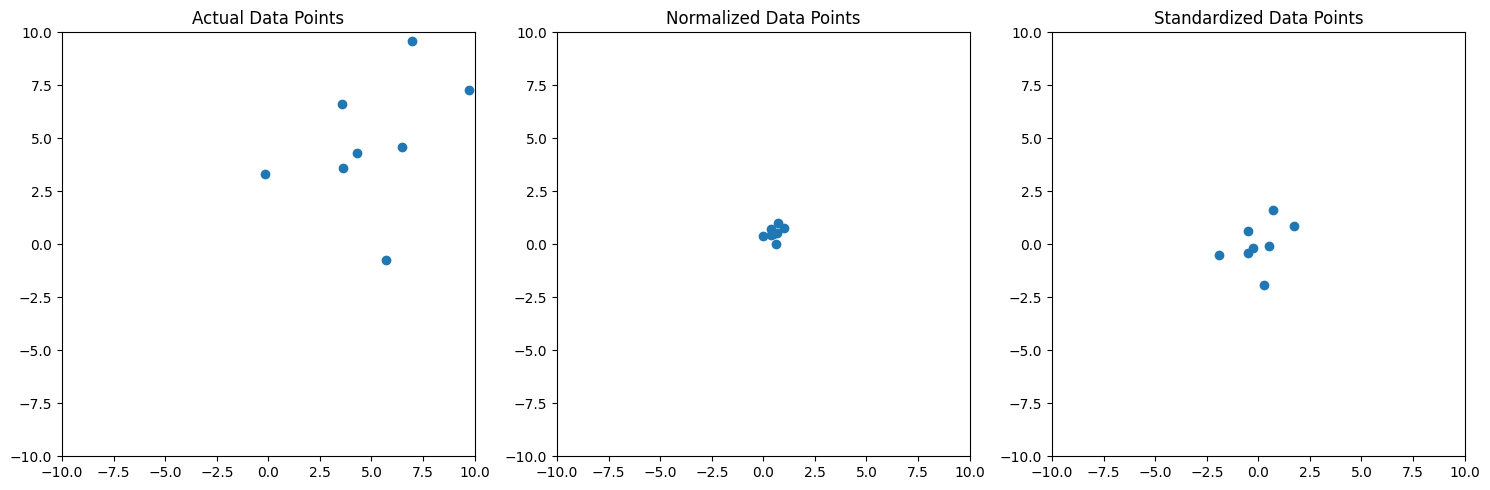

In [40]:
# viz

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

np.random.seed(42)
data = np.random.randn(8, 2) * 3 + 5  # Example data with mean=5, std=3

# Plot 1: Scattered data points
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Actual Data Points')

# Plot 2: Normalized data points
scaler_norm = MinMaxScaler()
data_normalized = scaler_norm.fit_transform(data)
plt.subplot(1, 3, 2)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Normalized Data Points')

# Plot 3: Standardized data points
scaler_std = StandardScaler()
data_standardized = scaler_std.fit_transform(data)
plt.subplot(1, 3, 3)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Standardized Data Points')

plt.tight_layout()
plt.show()


Feature normalization is helpful when training NNs because features are, well, normalized :shrug:

Stabilizes GD and improves convergence

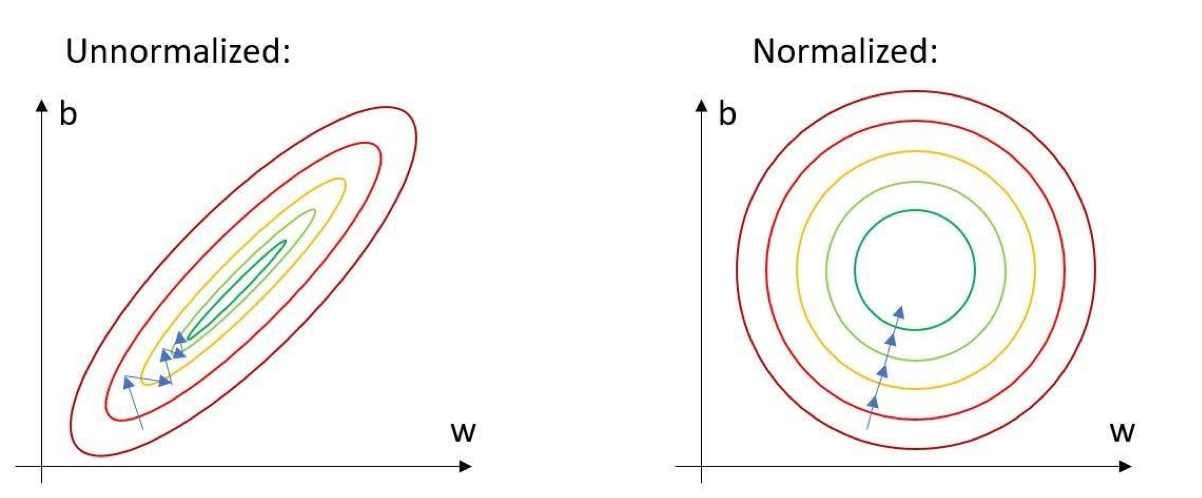

## Regularization techniques (continued)

L1 (Lasso) & L2 (Ridge) regularization is a term for loss functions.

Cost function = Loss(...) + reg

**L2 (Weight decay / Ridge Regression)**

Weight decay because during training, the term penalizes large weights by adding the sum of squared weights to the loss function.

$Cost function = Loss + \frac{\lambda}{2m} * \sum ||{w}||^2 $

$\lambda$ = a hyperparam, m = batch size, w = weight matrix


**L1 (Lasso)**

Useful when we want to reduce the weights to 0. "Removes" features.

$Cost function = Loss + \frac{\lambda}{2m} * \sum ||{w}|| $


| L1 Regularization | L2 Regularization |
| ----------------- | ----------------- |
| Penalizes sum of abs values of weights | Penalizes sum of square values of weights |
| Generates model that is simple and interpretable | Able to learn complex data patterns |
| Robust to outliers | Not robust to outliers |


**Drop out**

Some nodes randomly selected as "dead" and temporarily removed from the NN during training iterations.

When weights are removed, they have no effect on the output, and the weights cannot update during backprob.

This can make the network generalize better.

### Hyperparams

- Learning rate
- Optimization algo (adam, RMSProp, SGD...)
- Training epochs
- Batch size (use 2<sup>x</sup>)
- Activation functions (ReLU)
- Dataset split ratio (train, test, val)
- Dataset shuffle
- Hidden layers
- Drop out rate
- more

### Gridsearch

Hyperparam optimization: running models with various hyperparameters to determine the best combination for effective training.